# Session 3 — Profiling & Cleaning Data

Assess data quality with SQL and seaborn; fix inconsistencies with UPDATE.


## Environment Setup

In [1]:
import sys, sqlite3, pandas as pd, numpy as np, matplotlib.pyplot as plt
print(sys.version)
import seaborn as sns
sns.set_theme()
from pathlib import Path
DB_PATH = Path('course.db')
conn = sqlite3.connect(DB_PATH)
conn.execute('PRAGMA foreign_keys=ON;')
print('SQLite ready at', DB_PATH.resolve())

3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)]
SQLite ready at /Users/subhasht/Desktop/VSCode Programs/GenAI_Curriculum/Phase1/Data_Engineering/course.db


In [2]:
def run_sql(q, params=None):
    params = params or {}
    df = pd.read_sql_query(q, conn, params=params)
    display(df)
    return df

## 1. Profiling Basics

In [3]:
run_sql("SELECT COUNT(*) AS n_customers FROM customers;")
run_sql("SELECT MIN(price) AS min_price, MAX(price) AS max_price, AVG(price) AS avg_price FROM products;")
missing = run_sql("SELECT * FROM customers WHERE address IS NULL;")

,n_customers
0,4


,min_price,max_price,avg_price
0,9.99,189.0,64.62


,customer_id,name,city,country,address
0,3,Chloe,Chicago,USA,None


## 2. Visualize Distributions

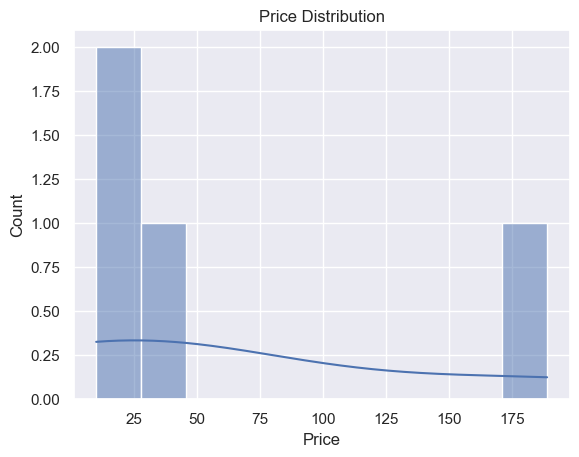

In [4]:
dfp = pd.read_sql_query("SELECT * FROM products;", conn)
sns.histplot(dfp['price'], bins=10, kde=True)
plt.title("Price Distribution"); plt.xlabel("Price"); plt.ylabel("Count"); plt.show()

## 3. Cleaning Examples

In [5]:
conn.execute("UPDATE customers SET address='Unknown' WHERE address IS NULL;")
conn.commit()
run_sql("SELECT * FROM customers;")

,customer_id,name,city,country,address
0,1,Aria,Austin,USA,1 River Rd
1,2,Ben,Berlin,Germany,Karlstr. 9
2,3,Chloe,Chicago,USA,Unknown
3,4,Dai,Denver,USA,11 Pine St


,customer_id,name,city,country,address
0,1,Aria,Austin,USA,1 River Rd
1,2,Ben,Berlin,Germany,Karlstr. 9
2,3,Chloe,Chicago,USA,Unknown
3,4,Dai,Denver,USA,11 Pine St
